In [ ]:
from configparser import ConfigParser

config = ConfigParser()
config.read('config.ini')
config['augmentations']['pad_trunc_noise_multiplier']


In [ ]:
import torch, torchaudio
import IPython.display as ipd

trimmed_audio, b = torchaudio.load(
    'E:/asdas.wav')

trimmed_audio = trimmed_audio[0][0:1000000]
print(trimmed_audio.shape)
trimmed_audio = torchaudio.functional.vad(trimmed_audio, b)
print(trimmed_audio.shape)
ipd.Audio(trimmed_audio, rate=b)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file =  './data/JQ_rec.txt'

label_list = [0]
time_list = [0]

with open(file) as f:
    for lbl in f.read().splitlines():
        lbl = lbl.split('\t')

        startTime = int(float(lbl[0]))
        endTime = int(float(lbl[1]))
        num_speakers = int(lbl[2])

        if startTime != time_list[-1]:
            time_list.append(startTime)
            label_list.append(1)
        time_list.append(endTime)
        label_list.append(int(num_speakers))
print(label_list)
print(time_list)
plt.step(time_list, label_list)

45
tensor([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])
tensor(0.9943) tensor(0.5000) tensor(0.0007)


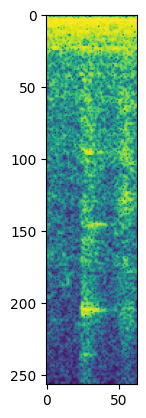

tensor(0.9984) tensor(0.5000) tensor(0.0009)


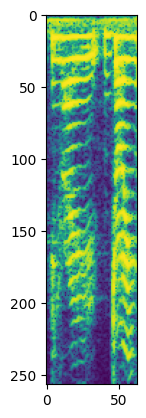

tensor(0.9971) tensor(0.5000) tensor(0.0013)


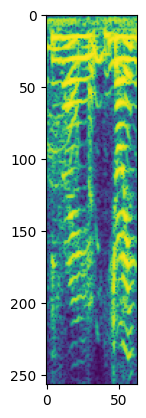

tensor(0.9943) tensor(0.5000) tensor(0.0062)


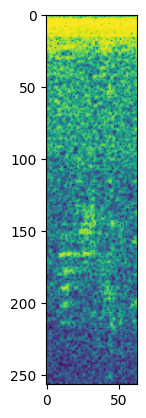

tensor(0.9951) tensor(0.5000) tensor(5.7546e-05)


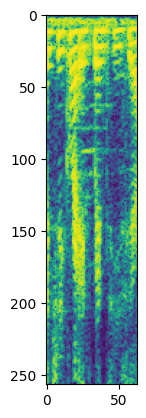

tensor(0.9928) tensor(0.5000) tensor(0.0003)


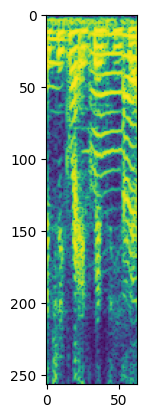

tensor(0.9933) tensor(0.5000) tensor(0.0035)


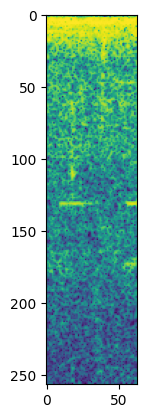

tensor(0.9975) tensor(0.5000) tensor(0.0011)


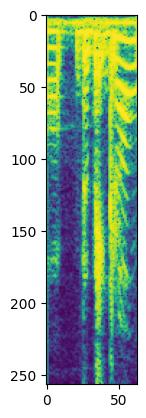

tensor(0.9953) tensor(0.5000) tensor(0.0005)


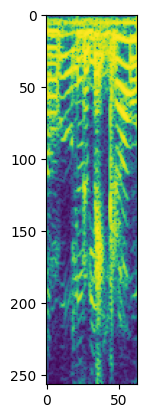

tensor(0.9902) tensor(0.5000) tensor(0.0027)


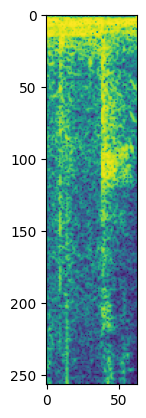

tensor(0.9984) tensor(0.5000) tensor(0.0006)


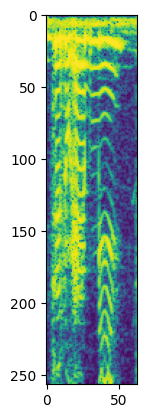

tensor(0.9977) tensor(0.5000) tensor(0.0010)


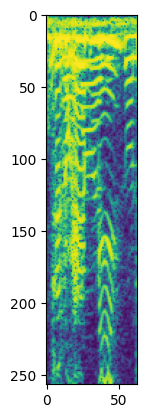

tensor(0.9929) tensor(0.5000) tensor(0.0041)


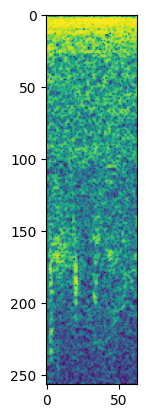

tensor(0.9984) tensor(0.5000) tensor(0.0033)


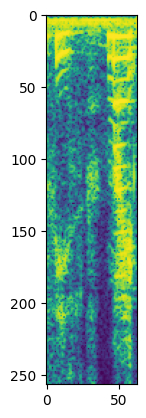

tensor(0.9975) tensor(0.5000) tensor(0.0012)


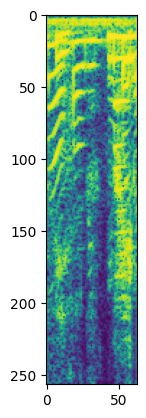

tensor(0.9843) tensor(0.5000) tensor(0.0037)


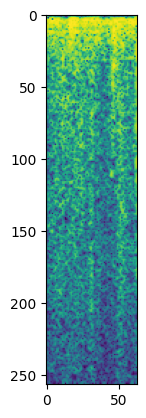

tensor(0.9976) tensor(0.5000) tensor(0.0022)


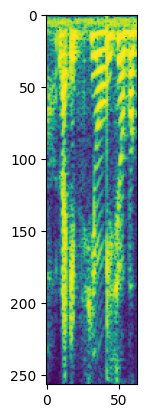

tensor(0.9956) tensor(0.5000) tensor(0.0004)


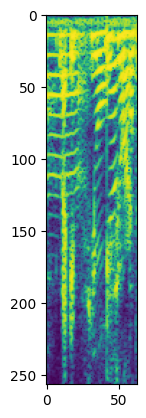

tensor(0.9934) tensor(0.5000) tensor(0.0050)


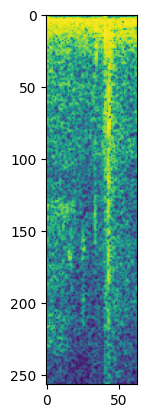

tensor(0.9969) tensor(0.5000) tensor(0.0007)


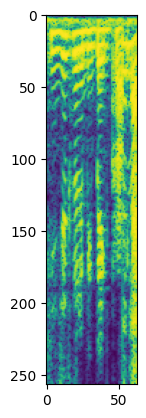

tensor(0.9949) tensor(0.5000) tensor(0.0005)


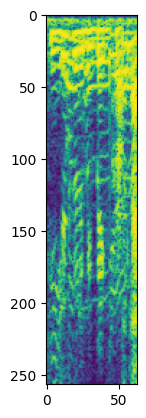

tensor(0.9955) tensor(0.5000) tensor(0.0022)


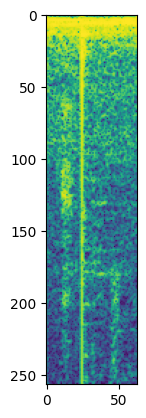

tensor(0.9964) tensor(0.5000) tensor(0.0017)


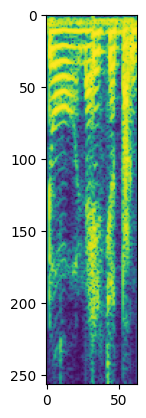

tensor(0.9954) tensor(0.5000) tensor(0.0018)


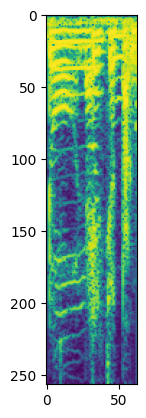

tensor(0.9952) tensor(0.5000) tensor(0.0020)


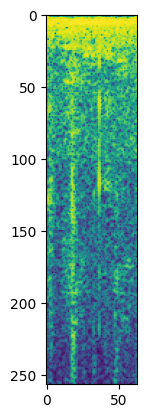

tensor(0.9904) tensor(0.5000) tensor(0.0001)


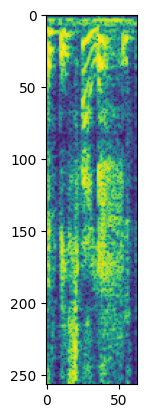

tensor(0.9875) tensor(0.5000) tensor(0.0003)


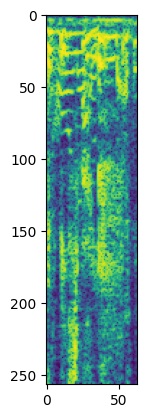

tensor(0.9964) tensor(0.5000) tensor(0.0045)


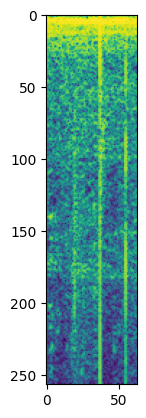

tensor(0.9975) tensor(0.5000) tensor(0.0007)


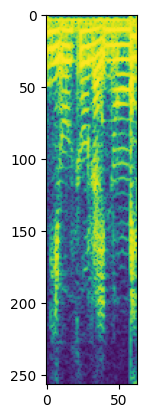

tensor(0.9956) tensor(0.5000) tensor(0.0017)


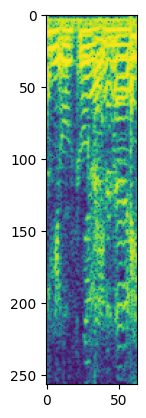

tensor(0.9940) tensor(0.5000) tensor(0.0032)


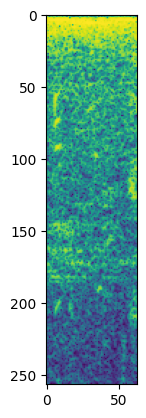

tensor(0.9972) tensor(0.5000) tensor(0.0005)


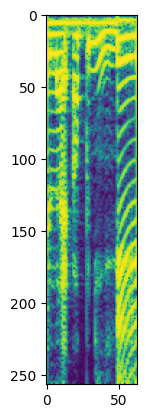

tensor(0.9954) tensor(0.5000) tensor(0.0009)


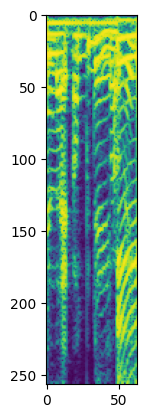

tensor(0.9966) tensor(0.5000) tensor(0.0064)


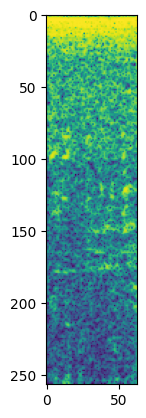

tensor(0.9940) tensor(0.5000) tensor(1.4204e-05)


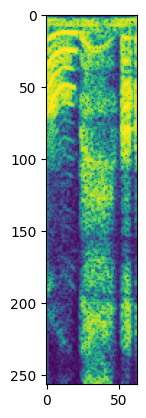

tensor(0.9904) tensor(0.5000) tensor(0.0023)


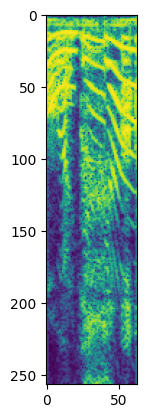

tensor(0.9949) tensor(0.5000) tensor(0.0042)


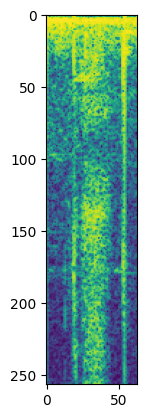

tensor(0.9944) tensor(0.5000) tensor(0.0019)


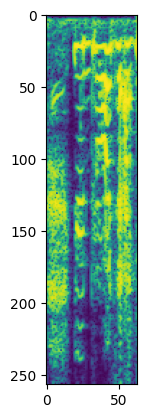

tensor(0.9936) tensor(0.5000) tensor(0.0005)


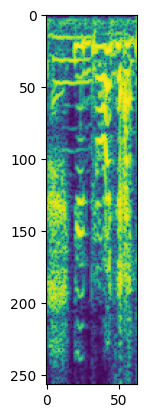

tensor(0.9948) tensor(0.5000) tensor(0.0061)


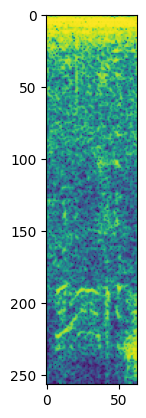

tensor(0.9986) tensor(0.5000) tensor(0.0002)


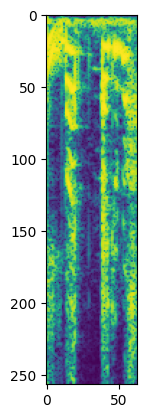

tensor(0.9981) tensor(0.5000) tensor(0.0002)


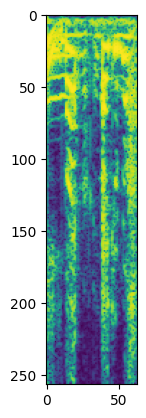

tensor(0.9900) tensor(0.5000) tensor(0.0003)


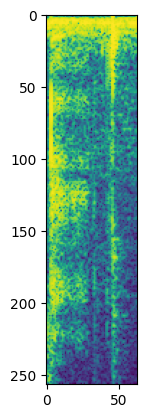

tensor(0.9981) tensor(0.5000) tensor(0.0002)


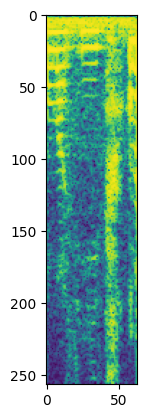

tensor(0.9953) tensor(0.5000) tensor(0.0007)


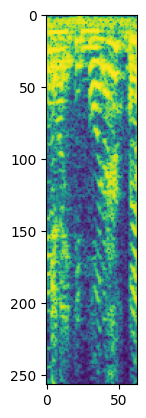

In [2]:
import torch
from loader.AudioDataset import specMask, collate_batch, createDataset
from torch.utils.data import Dataset
import loader.utils as utils
import matplotlib.pyplot as plt

audio_paths, _ = utils.getAudioPaths('/media/jianquan/Data/Processed Audio/')

audio_train_dataset = createDataset(audio_paths, transformParams = utils.getTransforms(False))

test_dataloader = torch.utils.data.DataLoader(
    audio_train_dataset,
    batch_size=1,
    num_workers=0,
    shuffle=True,
    collate_fn = collate_batch
)

batch = next(iter(test_dataloader))
batch

print(len(batch[0]))
print(batch[1])

for b in batch[0]:
    print(b.max(),b.median(),b.min())
    plt.imshow(b[0])
    plt.show()

In [ ]:
import librosa
import librosa.display
import torchaudio
import numpy as np

wav, sr = librosa.load('./data/JQ_rec.wav')

spec = np.abs(librosa.stft(wav[32000:64000], n_fft = 128))

spec = spec/(spec + np.median(spec))

import matplotlib.pyplot as plt

plt.imshow(spec)

In [ ]:
import matplotlib.pyplot as plt
import torch, torchaudio

a = torchaudio.load('/media/jianquan/Data/Original Audio/Singapore Speech Corpus/[P] Part 3 Same BoundaryMic/3003.wav')[0]
b = torchaudio.load('/media/jianquan/Data/Processed Audio/SPEECH/4 Diff Room/sur_2010_6020_phnd_cs-mly.wav')[0]
a

In [ ]:
a = a[0][0:32000]
b = b[0][0:32000]
a.shape

In [4]:
import random

a = random.uniform(0.4,0.6)